In [481]:
import pandas
import pandas as pd
from pandas import DataFrame as df
import pickle
import matplotlib.pyplot as plt
import numpy as np
from rdkit.Chem import AllChem as Chem
import rdkit.Chem

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [482]:
path = '/Users/dis/PycharmProjects/colocalization-plot/pos_san'
pos_df = pd.read_pickle(path) 

path = '/Users/dis/PycharmProjects/colocalization-plot/neg_san'
neg_df = pd.read_pickle(path)

In [483]:
pos_df.columns

Index(['formula', 'adduct', 'msm', 'fdr', 'off_sample', 'intensity_avg',
       'msm_H2O', 'fdr_H2O', 'off_sample_H2O', 'intensity_avg_H2O',
       'has_matching_loss', 'colocalization', 'ds_id', 'lir', 'polarity', 'id',
       'any_loss', 'loss_wparent', 'a_CA', 'b_CA', 'c_CA', 'd_OH', 'e_OH',
       'a_CA-b_CA', 'a_CA-c_CA', 'a_CA-d_OH', 'a_CA-e_OH', 'b_CA-c_CA',
       'b_CA-d_OH', 'b_CA-e_OH', 'c_CA-d_OH', 'c_CA-e_OH', 'd_OH-e_OH',
       'a_CA-b_CA-c_CA', 'a_CA-b_CA-d_OH', 'a_CA-b_CA-e_OH', 'a_CA-c_CA-d_OH',
       'a_CA-c_CA-e_OH', 'a_CA-d_OH-e_OH', 'b_CA-c_CA-d_OH', 'b_CA-c_CA-e_OH',
       'b_CA-d_OH-e_OH', 'c_CA-d_OH-e_OH', 'a_CA-b_CA-c_CA-d_OH',
       'a_CA-b_CA-c_CA-e_OH', 'a_CA-b_CA-d_OH-e_OH', 'a_CA-c_CA-d_OH-e_OH',
       'b_CA-c_CA-d_OH-e_OH', 'a_CA-b_CA-c_CA-d_OH-e_OH', 'confuse',
       'mol_name', 'Molecule', 'bits'],
      dtype='object')

In [484]:
# Do analysis first for any loss!
# p_expt_wp = np.array(pos_df.loss_wparent.astype('bool'))
# n_expt_wp = np.array(neg_df.loss_wparent.astype('bool'))

p_x = list(pos_df.bits)
p_x = np.array(p_x)
p_x = np.squeeze(p_x)
p_y = np.array(pos_df.any_loss.astype('bool'))

n_x = list(neg_df.bits)
n_x = np.array(n_x)
n_x = np.squeeze(n_x)
n_y = np.array(neg_df.any_loss.astype('bool'))

In [485]:
np.array(n_x).shape

(1000, 1024)

In [486]:
p_x_train, p_x_test, p_y_train, p_y_test = train_test_split(p_x,
                                                            p_y,
                                                            random_state =0
                                                           )
n_x_train, n_x_test, n_y_train, n_y_test = train_test_split(n_x,
                                                            n_y,
                                                            random_state =0
                                                           )

Apply the various models from "Introduciton to machine learning with Python" by Muller and Guido to this data!

First try "KNeighbors"

In [487]:
kn_clf = KNeighborsClassifier(n_neighbors=3)

In [488]:
kn_clf.fit(p_x_train, p_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [489]:
kn_clf.score(p_x_train, p_y_train)

0.8249754178957719

In [490]:
kn_clf.score(p_x_test, p_y_test)

0.6588235294117647

In [491]:
kn_clf = KNeighborsClassifier(n_neighbors=3)

In [492]:
kn_clf.fit(n_x_train, n_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [493]:
kn_clf.score(n_x_train, n_y_train)

0.8693333333333333

In [494]:
kn_clf.score(n_x_test, n_y_test)

0.736

Now try "Linear Regression"

In [495]:
p_lr = LinearSVC(max_iter=10000).fit(p_x_train, p_y_train)
n_lr = LinearSVC(max_iter=10000).fit(n_x_train, n_y_train)

In [496]:
p_lr.score(p_x_train, p_y_train)

0.9380530973451328

In [497]:
p_lr.score(p_x_test, p_y_test)

0.638235294117647

In [498]:
n_lr.score(n_x_train, n_y_train)

0.9653333333333334

In [499]:
n_lr.score(n_x_test, n_y_test)

0.76

Now try Naive Bayes, use Bernoulli re: binary or Boolean data:

In [500]:
p_nb = BernoulliNB().fit(p_x_train, p_y_train)
n_nb = BernoulliNB().fit(n_x_train, n_y_train)

In [501]:
p_nb.score(p_x_train, p_y_train)

0.783677482792527

In [502]:
p_nb.score(p_x_test, p_y_test)

0.6588235294117647

In [503]:
n_nb.score(n_x_train, n_y_train)

0.836

In [504]:
n_nb.score(n_x_test, n_y_test)

0.724

Now let's try a decesion tree classifier!

In [505]:
p_tree = DecisionTreeClassifier(max_depth=5, random_state=0).fit(p_x_train, p_y_train)
n_tree = DecisionTreeClassifier(max_depth=5, random_state=0).fit(n_x_train, n_y_train)

In [506]:
p_tree.score(p_x_train, p_y_train)

0.6568338249754179

In [507]:
p_tree.score(p_x_test, p_y_test)

0.6352941176470588

In [508]:
n_tree.score(n_x_train, n_y_train)

0.736

In [509]:
n_tree.score(n_x_test, n_y_test)

0.732

In [510]:
export_graphviz(p_tree, out_file='p_tree.dot')
export_graphviz(p_tree, out_file='n_tree.dot')

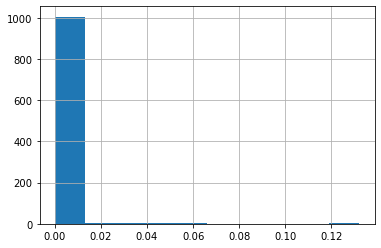

In [511]:
pd.Series(p_tree.feature_importances_).hist()

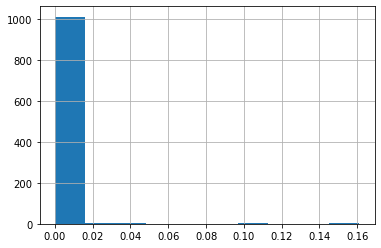

In [512]:
pd.Series(n_tree.feature_importances_).hist()

Let's try to make a random forest classifier!

In [513]:
p_rf = RandomForestClassifier(max_features=32, n_estimators=100, random_state=0).fit(p_x_train, p_y_train)
n_rf = RandomForestClassifier(max_features=32, n_estimators=100, random_state=0).fit(n_x_train, n_y_train)

In [514]:
p_rf.score(p_x_train, p_y_train)

0.9380530973451328

In [515]:
p_rf.score(p_x_test, p_y_test)

0.6705882352941176

In [516]:
n_rf.score(n_x_train, n_y_train)

0.9653333333333334

In [517]:
n_rf.score(n_x_test, n_y_test)

0.78

Gradient boosted regression tree / GB machines:

In [518]:
p_gb = GradientBoostingClassifier(random_state=0, max_depth=3).fit(p_x_train, p_y_train)
n_gb = GradientBoostingClassifier(random_state=0, max_depth=3).fit(n_x_train, n_y_train)

In [519]:
p_gb.score(p_x_train, p_y_train)

0.8859390363815143

In [520]:
p_gb.score(p_x_test, p_y_test)

0.6823529411764706

In [521]:
n_gb.score(n_x_train, n_y_train)

0.924

In [522]:
n_gb.score(n_x_test, n_y_test)

0.764

(Kernalized) Support Vector Machine (SVM):
*Parameters would likely need to be tuned...

In [528]:
p_svm = SVC(kernel='rbf', C=10, gamma=1.0).fit(p_x_train, p_y_train)
n_svm = SVC(kernel='rbf', C=10, gamma=1.0).fit(n_x_train, n_y_train)

In [529]:
p_svm.score(p_x_train, p_y_train)

0.9380530973451328

In [530]:
p_svm.score(p_x_test, p_y_test)

0.6264705882352941

In [531]:
n_svm.score(n_x_train, n_y_train)

0.9653333333333334

In [532]:
n_svm.score(n_x_test, n_y_test)

0.772

Neural network:

In [533]:
p_nn = MLPClassifier(solver='lbfgs', random_state=0).fit(p_x_train, p_y_train)
n_nn = MLPClassifier(solver='lbfgs', random_state=0).fit(n_x_train, n_y_train)

In [534]:
p_nn.score(p_x_train, p_y_train)

0.9380530973451328

In [535]:
p_nn.score(p_x_test, p_y_test)

0.6735294117647059

In [536]:
n_nn.score(n_x_train, n_y_train)

0.9653333333333334

In [537]:
n_nn.score(n_x_test, n_y_test)

0.792

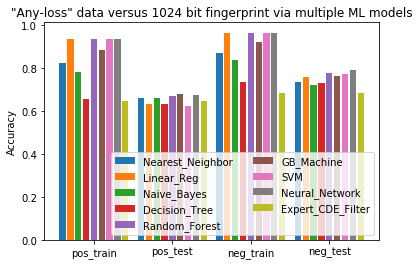

In [551]:
x_cats = ['pos_train', 'pos_test', 'neg_train', 'neg_test']
x = np.array([10, 20, 30, 40])
classes = ['Nearest_Neighbor', 'Linear_Reg', 'Naive_Bayes',
           'Decision_Tree', 'Random_Forest', 'GB_Machine',
           'SVM', 'Neural_Network', 'Expert_CDE_Filter']
y0 = np.array([0.825, 0.659, 0.869, 0.736])
y1 = np.array([0.934, 0.634, 0.965, 0.760])
y2 = np.array([0.784, 0.659, 0.836, 0.724])
y3 = np.array([0.657, 0.635, 0.736, 0.732])
y4 = np.array([0.938, 0.671, 0.965, 0.780])
y5 = np.array([0.886, 0.682, 0.924, 0.764])
y6 = np.array([0.938, 0.626, 0.965, 0.772])
y7 = np.array([0.938, 0.673, 0.965, 0.792])
y8 = np.array([0.646, 0.646, 0.686, 0.686])

w = 1

plt.bar(x + -4, y0, label = classes[0])
plt.bar(x + -3, y1, label = classes[1])
plt.bar(x + -2, y2, label = classes[2])
plt.bar(x + -1, y3, label = classes[3])
plt.bar(x + 0, y4, label = classes[4])
plt.bar(x + 1, y5, label = classes[5])
plt.bar(x + 2, y6, label = classes[6])
plt.bar(x + 3, y7, label = classes[7])
plt.bar(x + 4, y8, label = classes[8])

plt.ylabel('Accuracy')
plt.title('"Any-loss" data versus 1024 bit fingerprint via multiple ML models')
plt.xticks(x ,x_cats)
plt.legend(loc=4, ncol=2)

No handles with labels found to put in legend.


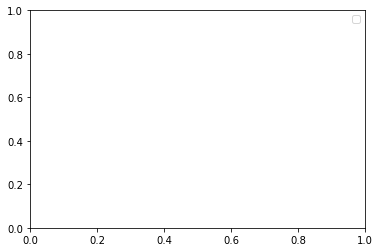

In [548]:
plt.legend(loc='best')